In [1]:
import cv2
# import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt
import os
import datetime

In [2]:
#set up model
#config and frozen graph copied from https://github.com/ankityddv/ObjectDetector-OpenCV
config = "model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
model_path = "model/frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(model_path,config)
model.setInputSize(512, 512)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputScale(1.0/127.5)

< cv2.dnn.Model 00000202777FFFD0>

In [3]:
# get class label mapping
import json
file_name = 'data/annotations/label_map.json'
f = open(file_name)
labels = json.load(f)
f.close()

In [4]:
# test image
test = np.asarray(PIL.Image.open('images/dog.jpeg'))
class_pred, confidence, boxes = model.detect(test, confThreshold=0.5)
font = cv2.FONT_HERSHEY_DUPLEX
for class_ix, conf, box in zip(class_pred, confidence, boxes):
    cv2.rectangle(test, box, (255, 0, 0), 2)
    cv2.putText(test, labels[str(class_ix)], (box[0]+10, box[1]+40), font, fontScale=5, color=(0, 255, 0), thickness=5)

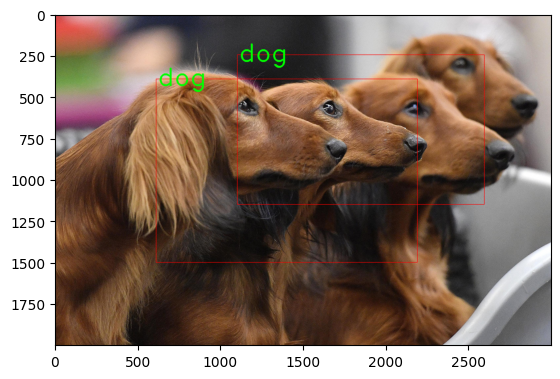

In [5]:
plt.imshow(test)

In [14]:
# test time to predict 1000 images
files=os.listdir('data/test2017')

In [15]:
import random
random_ix = random.sample(range(len(files)), 1000)

In [16]:
images = []
for i in random_ix:
    current = np.asarray(PIL.Image.open(f'data/test2017/{files[i]}'))
    images.append(current)

In [18]:
start = datetime.datetime.now()
for im in images:
    model.detect(im, confThreshold=0.5)
end = datetime.datetime.now()

In [19]:
#results
end-start

datetime.timedelta(seconds=161, microseconds=548877)

Test 1 (1000 images): <br>
System Type	x64-based PC<br>
Processor	Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, 2592 Mhz, 6 Core(s), 12 Logical Processor(s)<br>
GPU NVIDIA GeForce RTX 2070 with Max-Q Design:<br>
Obtained results in 2 minutes and 41 seconds (0.161 seconds per image) <br>
<br>
Test 2 (100 images):<br>
System Type ARM-based Raspberry pi 4<br>
64-bit quad-core Cortex-A72 processor<br>
Obtained results in 1 minute and 42 seconds (1.02 seconds per image)
